# Machine Learning for Regression

In [ ]:
# !pip install -r "/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/requirements - Colab.txt"

In [ ]:
# import library
import pandas as pd
import numpy as np
import os
import glob

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import machine learning model
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle

#import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import sys
sys.path.append('/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari')
# import collection_function as cus_viz

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [ ]:
# # Upload file from Google Drive

# from google.colab import files

# uploaded = files.upload()

In [ ]:
# data = pd.read_csv("insurance.csv")

# display(data.info())
# data.head()

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/refs/heads/main/dataset/USA_cars_datasets%20.csv")

display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


None

,index,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## Exploratory Data Analysis

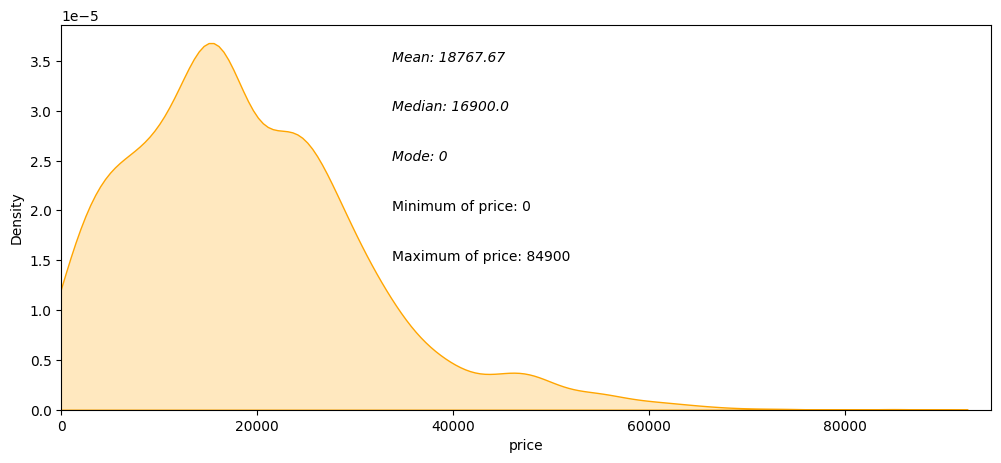

In [ ]:
# Distribution of Price
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(data["price"], color='orange', kde_kws={'shade':True}, hist=False,
             bins=10, ax=ax)

ax.text(data['price'].mean() + 15000, 0.000035, "Mean: "+ str(round(data['price'].mean(),2)), style='italic', fontsize=10)
ax.text(data['price'].mean() + 15000, 0.00003, "Median: "+ str(round(data['price'].median(),2)), style='italic', fontsize=10)
ax.text(data['price'].mean() + 15000, 0.000025, "Mode: "+ str(round(data['price'].mode()[0],2)), style='italic', fontsize=10)
ax.text(data['price'].mean() + 15000, 0.00002, "Minimum of price: " + str(data['price'].min()))
ax.text(data['price'].mean() + 15000, 0.000015, "Maximum of price: " + str(data['price'].max()))
plt.xlim([0, data['price'].max()+10000])
plt.show()

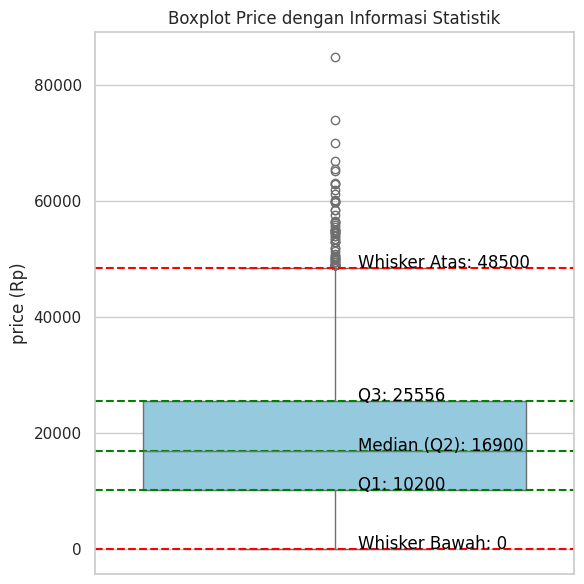

In [ ]:
## Check if there is any outlier
# Hitung statistik dasar
q1 = np.percentile(data['price'], 25)
q2 = np.percentile(data['price'], 50)
q3 = np.percentile(data['price'], 75)
iqr = q3 - q1
lower_whisker = max(data['price'][data['price'] >= q1 - 1.5 * iqr].min(), data['price'].min())
upper_whisker = min(data['price'][data['price'] <= q3 + 1.5 * iqr].max(), data['price'].max())

# Plot boxplot
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(y='price', data=data, color='skyblue')

# Tambahkan garis horizontal untuk statistik
for val, label in zip([q1, q2, q3, lower_whisker, upper_whisker],
                      ['Q1', 'Median (Q2)', 'Q3', 'Whisker Bawah', 'Whisker Atas']):
    plt.axhline(val, color='red' if "Whisker" in label else 'green', linestyle='--')
    plt.text(0.05, val + 20, f"{label}: {val:.0f}", color='black')

# Judul dan label
plt.title('Boxplot Price dengan Informasi Statistik')
plt.ylabel('price (Rp)')
plt.xlabel('')

plt.tight_layout()
plt.show()

## Data Pre-processing

In [ ]:
# Select desired columns
data_new = data.drop(columns=['index','vin','lot'])

In [ ]:
# Label Encoding for categorical columns
categorical_cols = ['brand', 'model', 'title_status', 'color', 'state', 'country', 'condition']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    encoded_col = f"{col}_encoded"
    data_new[encoded_col] = le.fit_transform(data_new[col])
    encoders[col] = le  # Save the encoder

data_new

,price,brand,model,year,title_status,mileage,color,state,country,condition,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,country_encoded,condition_encoded
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa,10 days left,27,25,0,2,24,1,3
1,2899,ford,se,2011,clean vehicle,190552,silver,tennessee,usa,6 days left,8,92,0,39,35,1,39
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa,2 days left,7,75,0,39,7,1,16
3,25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa,22 hours left,8,32,0,4,39,1,20
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa,22 hours left,5,0,0,34,6,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,california,usa,1 days left,24,120,0,34,3,1,0
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,florida,usa,21 hours left,24,120,0,39,6,1,19
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,florida,usa,21 hours left,24,120,0,39,6,1,19
2497,9200,nissan,versa,2018,clean vehicle,32557,black,florida,usa,2 days left,24,120,0,2,6,1,16


In [ ]:
def show_encoding_mappings(df, encoded_columns):
    for col in encoded_columns:
        original_col = col.replace('_encoded', '')
        if original_col in df.columns:
            print(f"\nMapping for '{original_col}' ➜ '{col}':")
            mapping_df = df[[original_col, col]].drop_duplicates().sort_values(col)
            print(mapping_df.to_string(index=False))

In [ ]:
encoded_columns = [
    'brand_encoded', 'model_encoded', 'title_status_encoded',
    'color_encoded', 'state_encoded', 'country_encoded', 'condition_encoded'
]

show_encoding_mappings(data_new, encoded_columns)



Mapping for 'brand' ➜ 'brand_encoded':
          brand  brand_encoded
          acura              0
           audi              1
            bmw              2
          buick              3
       cadillac              4
      chevrolet              5
       chrysler              6
          dodge              7
           ford              8
            gmc              9
harley-davidson             10
      heartland             11
          honda             12
        hyundai             13
       infiniti             14
         jaguar             15
           jeep             16
            kia             17
           land             18
          lexus             19
        lincoln             20
       maserati             21
          mazda             22
  mercedes-benz             23
         nissan             24
      peterbilt             25
            ram             26
         toyota             27

Mapping for 'model' ➜ 'model_encoded':
      model  model_en

In [ ]:
# Data for Machine Learning
cols = ['price', 'year', 'mileage', 'brand_encoded', 'model_encoded',
       'title_status_encoded', 'color_encoded', 'state_encoded', 'condition_encoded']
data_ml = data_new[cols]
data_ml.head()

,price,year,mileage,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,condition_encoded
0,6300,2008,274117,27,25,0,2,24,3
1,2899,2011,190552,8,92,0,39,35,39
2,5350,2018,39590,7,75,0,39,7,16
3,25000,2014,64146,8,32,0,4,39,20
4,27700,2018,6654,5,0,0,34,6,20


In [ ]:
# Separating dependent and independent variable
X = data_ml.drop(columns="price") #independent variable
y = data_ml["price"] #dependent variable

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## Modelling & Evaluation

### Simple Model

In [ ]:
# Logistic Regression Modelling
legReg = LinearRegression()
legReg.fit(X_train, y_train)

# Evaluation
y_predict_train = legReg.predict(X_train)
y_predict_test = legReg.predict(X_test)

print("Model: Linear Regression")
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_predict_test)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_predict_test)))
print("R2 Score: {:.2f}".format(r2_score(y_test, y_predict_test)))

Model: Linear Regression
MAE: 7534.78
MSE: 103997913.08
R2 Score: 0.26


### Regression Model with Function

In [ ]:
def regression_model(X_train, X_test, y_train, y_test, model):
  """
  This function is used to create a regression model.
  """

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data - {}'.format(model))
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

In [ ]:
# Linear Regression
regression_model(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                model=LinearRegression())

For training data - LinearRegression()
Mean Absolute Error: 7714.12
Mean Squared Error: 103970673.79
R2 Score: 0.30 



In [ ]:
# Decision Tree
regression_model(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                model=DecisionTreeRegressor())

For training data - DecisionTreeRegressor()
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R2 Score: 1.00 



In [ ]:
# Gradient Boosting
regression_model(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                model=GradientBoostingRegressor())

For training data - GradientBoostingRegressor()
Mean Absolute Error: 4585.29
Mean Squared Error: 41970493.00
R2 Score: 0.72 



## Hyperparameter Tuning

## Predict New Data

In [ ]:
X_test

,year,mileage,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,condition_encoded
731,2020,18715,5,64,0,39,22,40
530,2003,194673,5,32,1,15,36,13
754,2017,78368,5,117,0,46,24,14
248,2008,62015,8,84,0,46,32,0
960,2019,26443,7,14,0,2,27,19
...,...,...,...,...,...,...,...,...
924,2014,95377,7,117,0,46,3,16
1599,2019,25623,8,112,0,46,32,16
1558,2013,140870,8,32,0,46,31,25
152,2016,86826,8,32,0,15,34,19


In [ ]:
# modelling
lr = GradientBoostingRegressor()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Copy X_test original
X_test_copy = X_test.copy()

# Insert the price prediction and price original column
X_test_copy['price_prediction'] = y_test_pred
X_test_copy['price'] = y_test

X_test_copy.head(10)

,year,mileage,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,condition_encoded,price_prediction,price
731,2020,18715,5,64,0,39,22,40,20432.487700,25000
530,2003,194673,5,32,1,15,36,13,408.638708,0
754,2017,78368,5,117,0,46,24,14,12145.208649,10400
248,2008,62015,8,84,0,46,32,0,11283.374717,26500
960,2019,26443,7,14,0,2,27,19,25212.440294,23800
2203,2019,30902,8,58,0,27,27,16,16548.392083,13800
2162,2019,22019,8,54,0,2,27,39,23793.392581,25700
1212,2014,90888,8,103,0,46,1,16,21858.394498,20500
678,2019,34470,5,105,0,2,29,19,38766.991108,37100
1496,2019,18431,8,50,0,46,29,19,29584.211707,22600


In [ ]:
# data baru yang belum ada price
new_data = pd.DataFrame([{
    'year': 2022,
    'mileage': 25000,
    'brand': "dodge",
    'model': "mpv",
    'title_status': "clean vehicle",
    'color': "black",
    'state': "tennessee",
    'condition': "10 days left"
}])

# Tampilkan data baru
new_data


,year,mileage,brand,model,title_status,color,state,condition
0,2022,25000,dodge,mpv,clean vehicle,black,tennessee,10 days left


In [ ]:
# Assuming data_new contains raw text like "mpv", "cruiser", etc.
categorical_cols = ['brand', 'model', 'title_status', 'color', 'state', 'condition']

for col in categorical_cols:
    encoded_col = f"{col}_encoded"
    le = encoders[col]  # Load saved encoder
    new_data[encoded_col] = le.transform(new_data[col])

new_data.head()

,year,mileage,brand,model,title_status,color,state,condition,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,condition_encoded
0,2022,25000,dodge,mpv,clean vehicle,black,tennessee,10 days left,7,75,0,2,35,3


In [ ]:
new_data.columns

Index(['year', 'mileage', 'brand', 'model', 'title_status', 'color', 'state',
       'condition', 'brand_encoded', 'model_encoded', 'title_status_encoded',
       'color_encoded', 'state_encoded', 'condition_encoded'],
      dtype='object')

In [ ]:
new_prediction = lr.predict(new_data[['year', 'mileage', 'brand_encoded', 'model_encoded', 'title_status_encoded',
                            'color_encoded', 'state_encoded', 'condition_encoded']])

print("Hasil Prediksi {:.2f}".format(new_prediction[0]))

Hasil Prediksi 21554.52


## Preparation for Deployment

In [ ]:
# Simpan semua encoder ke dalam satu file
with open('label_encoders_regression.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# Simpan model yang digunakan
with open('trained_model_regression.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
data.iloc[100:110,:]

,index,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
100,100,13600,ford,focus,2018,clean vehicle,16971,black,1fadp3m26jl307477,167755490,south carolina,usa,21 hours left
101,101,23605,cadillac,door,2017,clean vehicle,35598,gray,1gyknbrsxhz114969,167765109,michigan,usa,2 days left
102,102,10780,ford,mpv,2017,clean vehicle,40455,white,1fm5k8ht0hga07252,167656360,texas,usa,2 days left
103,103,13800,ford,focus,2018,clean vehicle,23164,white,1fadp3j2xjl279400,167755491,south carolina,usa,21 hours left
104,104,25201,cadillac,door,2017,clean vehicle,19011,no_color,1gyknbrs8hz257399,167765111,michigan,usa,2 days left
105,105,7070,ford,mpv,2017,clean vehicle,45191,white,1fm5k7d82hgb39148,167656361,texas,usa,2 days left
106,106,8700,ford,focus,2018,clean vehicle,21405,white,1fadp3k23jl219764,167755494,south carolina,usa,21 hours left
107,107,18003,chevrolet,malibu,2017,clean vehicle,19117,no_color,1g1zh5sx7hf141060,167765112,michigan,usa,17 hours left
108,108,8530,ford,door,2017,clean vehicle,42104,black,1fm5k7f80hga03159,167656362,texas,usa,2 days left
109,109,23100,dodge,durango,2018,clean vehicle,49496,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left


In [ ]:
# data baru
data_baru = pd.DataFrame([{
    'year': 2017,
    'mileage': 42104,
    'brand': "ford",
    'model': "door",
    'title_status': "clean vehicle",
    'color': "black",
    'state': "texas",
    'condition': "2 days left"
}])

In [ ]:
# Load encoder dari file
with open('label_encoders_regression.pkl', 'rb') as f:
    loaded_encoders = pickle.load(f)

# Transformasi data baru
for col in data_baru.columns:
    if col in loaded_encoders:
        le = loaded_encoders[col]
        data_baru[col + '_encoded'] = le.transform(data_baru[col])

data_baru

,year,mileage,brand,model,title_status,color,state,condition,brand_encoded,model_encoded,title_status_encoded,color_encoded,state_encoded,condition_encoded
0,2017,42104,ford,door,clean vehicle,black,texas,2 days left,8,32,0,2,36,16


In [ ]:
# Load Model dari file
with open('trained_model_regression.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict the data
cols = ['year', 'mileage', 'brand_encoded', 'model_encoded', 'title_status_encoded',
        'color_encoded', 'state_encoded', 'condition_encoded']

new_prediction = model.predict(data_baru[cols])

print("\nHasil Prediksi ML Model untuk Harga Mobil: {:.2f}".format(new_prediction[0]))


Hasil Prediksi ML Model untuk Harga Mobil: 15619.12


## Model Deployment

In [ ]:
# !pip install pyngrok

In [ ]:
# !pip install flask_ngrok

In [ ]:
# Ganti dengan authtoken milik kamu dari https://dashboard.ngrok.com/get-started/setup
!ngrok authtoken 2QXqc8gX2jQDew20AIB8lpfgMZn_5tjMZ7PuHAYTzRM9xLaeL


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok
import pandas as pd
import numpy as np
import pickle

# Encoder JSON untuk hasil prediksi np.int64
from flask.json.provider import DefaultJSONProvider

# Inisialisasi app
app = Flask(__name__)

# Load model dan preprocessor
with open('trained_model_regression.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoders_regression.pkl', 'rb') as f:
    encoders = pickle.load(f)

# Categorical columns & numeric
categorical_cols = ['brand', 'model', 'title_status', 'color', 'state', 'condition']
numeric_cols = ['year', 'mileage']


# class CustomJSONProvider(DefaultJSONProvider):
#     def default(self, obj):
#         if isinstance(obj, (np.integer, np.int64)):
#             return int(obj)
#         return super().default(obj)

# app.json = CustomJSONProvider(app)

# Route test
@app.route("/", methods=["GET"])
def home():
    return jsonify({
        "message": "API is running!",
        "example_input": {
            "brand": "ford",
            "model": "focus",
            "year": 2022,
            "mileage": 25000,
            "title_status": "clean vehicle",
            "color": "black",
            "state": "tennessee",
            "condition": "10 days left"
        }
    })

# Route prediksi
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Ambil input JSON dari user
        data = request.get_json()

        # Validasi input
        required_fields = categorical_cols + numeric_cols
        missing = [col for col in required_fields if col not in data]
        if missing:
            return jsonify({"status": "error", "message": f"Missing fields: {missing}"}), 400

        # Format ke DataFrame (harap input sesuai urutan dan kolom yang dipakai)
        df = pd.DataFrame([data])  # Assumes all fields are included

        # Encode categorical
        for col in categorical_cols:
            le = encoders[col]
            df[f"{col}_encoded"] = le.transform(df[col])

        # Gabungkan fitur
        final_features = numeric_cols + [f"{col}_encoded" for col in categorical_cols]
        input_data = df[final_features]

        # Prediksi
        prediction = model.predict(input_data)

        return jsonify({"status": "ok", "prediction": float(prediction[0])})

    except Exception as e:
        return jsonify({"status": "error", "message": str(e)}), 500

# Expose port 5000 with ngrok
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

# Run the app
app.run(port=5000)


Public URL: NgrokTunnel: "https://8e13-34-23-186-122.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 13:42:07] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 13:42:09] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 13:42:44] "POST /predict HTTP/1.1" 500 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 13:43:23] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/Jun/2025 13:43:32] "POST /predict HTTP/1.1" 200 -


In [ ]:
# contoh sample
{
  "brand": "toyota",
  "model": "cruiser",
  "year": 2008,
  "mileage": 274117,
  "title_status": "clean vehicle",
  "color": "black",
  "state": "new jersey",
  "condition": "10 days left"
}

### Deployment in Hugging Face Space

In [ ]:
from flask import Flask, jsonify, request
import pandas as pd
import numpy as np
import pickle


# Inisialisasi app
app = Flask(__name__)

# Load model dan preprocessor
with open('trained_model_regression.pkl', 'rb') as f:
    model = pickle.load(f)

with open('label_encoders_regression.pkl', 'rb') as f:
    encoders = pickle.load(f)

# Categorical columns & numeric
categorical_cols = ['brand', 'model', 'title_status', 'color', 'state', 'condition']
numeric_cols = ['year', 'mileage']


# Route test
@app.route("/", methods=["GET"])
def home():
    return jsonify({
        "message": "API is running!",
        "example_input": {
            "brand": "ford",
            "model": "focus",
            "year": 2022,
            "mileage": 25000,
            "title_status": "clean vehicle",
            "color": "black",
            "state": "tennessee",
            "condition": "10 days left"
        }
    })

# Route prediksi
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Ambil input JSON dari user
        data = request.get_json()

        # Validasi input
        required_fields = categorical_cols + numeric_cols
        missing = [col for col in required_fields if col not in data]
        if missing:
            return jsonify({"status": "error", "message": f"Missing fields: {missing}"}), 400

        # Format ke DataFrame (harap input sesuai urutan dan kolom yang dipakai)
        df = pd.DataFrame([data])  # Assumes all fields are included

        # Encode categorical
        for col in categorical_cols:
            le = encoders[col]
            df[f"{col}_encoded"] = le.transform(df[col])

        # Gabungkan fitur
        final_features = numeric_cols + [f"{col}_encoded" for col in categorical_cols]
        input_data = df[final_features]

        # Prediksi
        prediction = model.predict(input_data)

        return jsonify({"status": "ok", "prediction": float(prediction[0])})

    except Exception as e:
        return jsonify({"status": "error", "message": str(e)}), 500

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=7860)